# 1. Import library

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as scs
import joblib
import yaml
import pickle
import src.util as utils
from imblearn.under_sampling import RandomUnderSampler
import sys

# 2. Load Configuration File

In [ ]:
config = utils.load_config()

In [ ]:
#Load Configuration Files
def load_config(config_dir):
    with open(config_dir, 'r') as file:
        config = yaml.safe_load(file)
    return config

In [ ]:
config = load_config(config_dir)

In [ ]:
config = utils.load_config()

# 2. Dataset

### 2.1.  Mengakses dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [6]:
bank_df = pd.read_csv("bank.csv")

In [7]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### 2.1.  Data Cleaning

#### a. mengganti input variabel pdays

In [19]:
# 999 means client was not previously contacted
bank_df.loc[bank_df["pdays"]<0, "pdays"]=999
bank_df["pdays"].describe()

count    4521.000000
mean      859.275603
std       301.892276
min         1.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64

#### a. cek data duplicate

In [10]:
# cek data duplicate
duplicate_status = bank_df.duplicated()
duplicate_status.sum()

0

keterangan: tidak ada data duplicate

#### b. cek data kosong

In [11]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

keterangan: sudah tidak ada data yanng kosong

# 3. EDA

**Data Categorical**
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome
- y

**Data Numerical**
- age
- balance
- day
- campaign
- pdays
- previous
- duration

In [12]:
# tabel data numerik
numerical_column = ["age", "balance", "day", "duration",
                    "campaign", "pdays", "previous"]
numerical_tabel = bank_df[numerical_column]
numerical_tabel.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,999,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,999,0
4,59,0,5,226,1,999,0


In [14]:
# tabel data kategorik
bank_column = list(bank_df.columns)
categorical_column = list(set(bank_column).difference(set(numerical_column)))
categorical_tabel = bank_df[categorical_column]
categorical_tabel.head()

,education,loan,marital,housing,y,contact,default,month,poutcome,job
0,primary,no,married,no,no,cellular,no,oct,unknown,unemployed
1,secondary,yes,married,yes,no,cellular,no,may,failure,services
2,tertiary,no,single,yes,no,cellular,no,apr,failure,management
3,tertiary,yes,married,yes,no,unknown,no,jun,unknown,management
4,secondary,no,married,yes,no,unknown,no,may,unknown,blue-collar


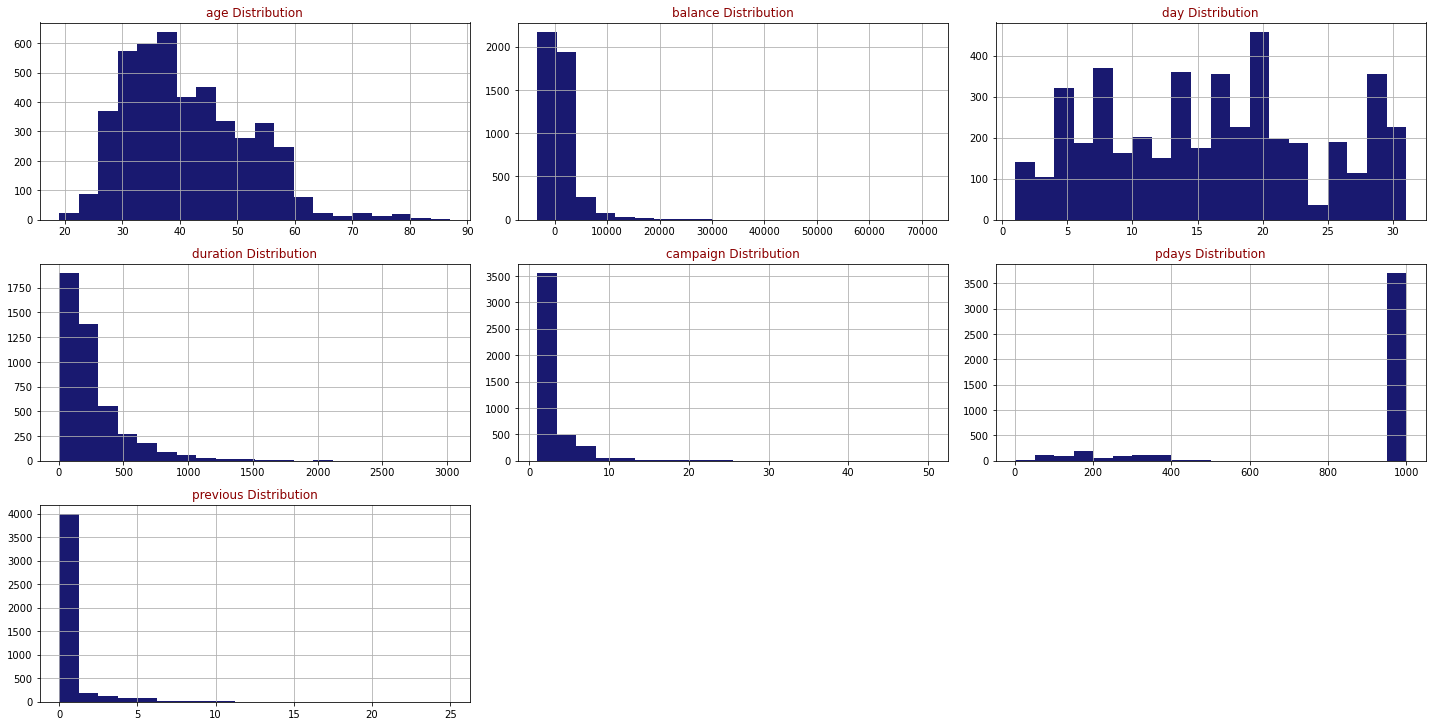

In [13]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(numerical_tabel,numerical_tabel.columns,6,3)

<AxesSubplot:>

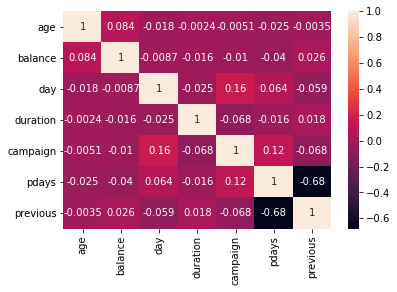

In [20]:
correlation = bank_df.corr()  
seaborn. heatmap (correlation, annot = True)   

# 3. Data Preprocessing

### 2.1.  Input-Output Split

In [21]:
#sebelum melakukan split data, diubah dulu isi dari variabbel "y"
bank_df.loc[bank_df["y"]=="no", "y"] = 0
bank_df.loc[bank_df["y"]=="yes", "y"] = 1
bank_df["y"] = bank_df["y"].astype("int")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,999,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,999,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,999,0,unknown,0


In [22]:
# buat data output 
output_data = bank_df["y"]

In [23]:
output_data.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [24]:
#buat data input
input_data = bank_df.drop(["y"], 
                          axis = 1)

In [25]:
input_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,999,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,999,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,999,0,unknown


Selanjutnya, agar lebih mudah, masukkan buat fungsi untu data input output 

In [26]:
def extractInputOutput(data,
                       output_column_name):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

# (data, output_column_name) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb. diberi argumen data = bank_df, 
# maka semua variabel 'data' di dalam fungsi akan berubah menjadi bank_df

In [27]:
# Jangan sampai salah urutan dalam penempatan return
X, y = extractInputOutput(data = bank_df,
                          output_column_name = "y")

### 2.2.  Split data Train-Test

In [28]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 12)

In [29]:
# Sanity check hasil splitting
print(X_train.shape)
print(X_test.shape)

(3390, 16)
(1131, 16)


In [30]:
#pengecekan apakah test size sudah sesuai dengan ratio
X_test.shape[0] / X.shape[0]


0.25016589250165894

### 2.3.  Menghapus varibel yang tidak dibutuhkan

Variabel "duration" tidak dapat digunakan karena variabel ini berhungan dengan variabel output. Dimana duration didapatkan setelah mengetahui hasil dari output, yaitu panggilan telepon kepada nasabah. Karena tujuan dari pemodelan ini adalah untuk memperediksi hasil sebelum dilakukan panggilan telepon, maka variabel ini harus dihapus dari data input.

In [31]:
X_train.drop(["duration"], axis=1, inplace=True)
X_test.drop(["duration"], axis=1, inplace=True)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
1649,37,services,single,secondary,no,608,no,no,cellular,14,may,3,999,0,unknown
3368,57,services,divorced,secondary,no,4664,no,no,cellular,21,nov,4,114,1,failure
2028,45,entrepreneur,married,secondary,no,245,yes,no,unknown,14,may,3,999,0,unknown
1095,36,technician,married,secondary,no,300,no,no,unknown,9,jun,1,999,0,unknown
487,52,blue-collar,married,primary,no,779,yes,no,unknown,16,may,3,999,0,unknown


### 2.4. Preprocessing Categorical Variables

- mengubah data categorical menjadi numerical dengan One Hot Encoding (OHE)

**Data Categorical**
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome

**Data Numerical**
- age
- balance
- day
- campaign
- pdays
- previous

In [33]:
# tabel data numerik
numerical_column = ["age", "balance", "day", 
                    "campaign", "pdays", "previous"]
X_train_numerical = X_train[numerical_column]
X_test_numerical = X_test[numerical_column]

In [34]:
def extractCategorical(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :return categorical_ohe: <pandas dataframe> data sample dengan ohe
    """
    data_categorical = data[categorical_column]
    categorical_ohe = pd.get_dummies(data_categorical)

    return categorical_ohe

In [35]:
# tabel data kategorik (data train)
X_train_column = list(X_train.columns)
categorical_column = list(set(X_train_column).difference(set(numerical_column)))
X_train_categorical_ohe = extractCategorical(data = X_train,
                                             categorical_column = categorical_column)
X_train_categorical_ohe.head()

,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes,marital_divorced,marital_married,marital_single,housing_no,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
1649,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3368,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2028,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1095,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
487,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# tabel data kategorik (data test)
X_test_column = list(X_test.columns)
categorical_column = list(set(X_test_column).difference(set(numerical_column)))
X_test_categorical_ohe = extractCategorical(data = X_test,
                                             categorical_column = categorical_column)
X_test_categorical_ohe.head()

,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes,marital_divorced,marital_married,marital_single,housing_no,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
2957,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2032,1,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
860,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4228,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2389,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


### 2.5.  Join data Numerical dan Categorical

In [37]:
X_train_concat = pd.concat([X_train_numerical,
                            X_train_categorical_ohe],
                           axis = 1)
X_train_concat.head()

,age,balance,day,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
1649,37,608,14,3,999,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3368,57,4664,21,4,114,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2028,45,245,14,3,999,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1095,36,300,9,1,999,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
487,52,779,16,3,999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#cek lagi missing data data train
X_train_concat.isnull().sum()

age                    0
balance                0
day                    0
campaign               0
pdays                  0
previous               0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
loan_no                0
loan_yes               0
marital_divorced       0
marital_married        0
marital_single         0
housing_no             0
housing_yes            0
contact_cellular       0
contact_telephone      0
contact_unknown        0
default_no             0
default_yes            0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
job_admin.             0
job_blue-collar        0


In [39]:
X_test_concat = pd.concat([X_test_numerical,
                            X_test_categorical_ohe],
                           axis = 1)
X_test_concat.head()

,age,balance,day,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
2957,50,0,20,2,999,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2032,59,1727,25,4,358,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
860,58,309,19,2,999,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,36,-206,8,2,999,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2389,53,6072,16,4,999,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
#cek lagi missing data data test
X_train_concat.isnull().sum()

age                    0
balance                0
day                    0
campaign               0
pdays                  0
previous               0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
loan_no                0
loan_yes               0
marital_divorced       0
marital_married        0
marital_single         0
housing_no             0
housing_yes            0
contact_cellular       0
contact_telephone      0
contact_unknown        0
default_no             0
default_yes            0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
job_admin.             0
job_blue-collar        0


### 2.6.  Standardizing Variables

In [41]:
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [42]:
# standardizing data train
X_train_clean, standardizer = standardizerData(data = X_train_concat)
X_train_clean.head()

,age,balance,day,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
1649,-0.399483,-0.266468,-0.220002,0.073204,0.451954,-0.303581,-0.428555,0.990605,-0.653734,-0.205999,...,-0.191565,-0.157443,-0.525238,-0.229059,-0.204438,3.157669,-0.126026,-0.451955,-0.173442,-0.092889
3368,1.529231,1.091207,0.631653,0.403205,-2.534741,0.264691,-0.428555,0.990605,-0.653734,-0.205999,...,-0.191565,-0.157443,-0.525238,-0.229059,-0.204438,3.157669,-0.126026,-0.451955,-0.173442,-0.092889
2028,0.372003,-0.387975,-0.220002,0.073204,0.451954,-0.303581,-0.428555,0.990605,-0.653734,-0.205999,...,5.220153,-0.157443,-0.525238,-0.229059,-0.204438,-0.316689,-0.126026,-0.451955,-0.173442,-0.092889
1095,-0.495918,-0.369565,-0.828327,-0.586799,0.451954,-0.303581,-0.428555,0.990605,-0.653734,-0.205999,...,-0.191565,-0.157443,-0.525238,-0.229059,-0.204438,-0.316689,-0.126026,2.212612,-0.173442,-0.092889
487,1.047053,-0.209228,0.023328,0.073204,0.451954,-0.303581,2.333424,-1.009485,-0.653734,-0.205999,...,-0.191565,-0.157443,-0.525238,-0.229059,-0.204438,-0.316689,-0.126026,-0.451955,-0.173442,-0.092889


In [43]:
# standardizing data test
X_test_clean, standardizer = standardizerData(data = X_test_concat)
X_test_clean.head()

,age,balance,day,campaign,pdays,previous,education_primary,education_secondary,education_tertiary,education_unknown,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
2957,0.783246,-0.481065,0.452379,-0.251855,0.495238,-0.384454,2.537871,-1.053601,-0.648733,-0.212806,...,-0.210526,6.058052,-0.513505,-0.238766,-0.208226,-0.324918,-0.167874,-0.453604,-0.162221,-0.089562
2032,1.589136,0.080895,1.053320,0.347826,-1.525162,0.970118,2.537871,-1.053601,-0.648733,-0.212806,...,-0.210526,-0.165070,1.947402,-0.238766,-0.208226,-0.324918,-0.167874,-0.453604,-0.162221,-0.089562
860,1.499592,-0.380518,0.332191,-0.251855,0.495238,-0.384454,2.537871,-1.053601,-0.648733,-0.212806,...,-0.210526,-0.165070,-0.513505,-0.238766,-0.208226,-0.324918,-0.167874,-0.453604,-0.162221,-0.089562
4228,-0.470359,-0.548097,-0.989878,-0.251855,0.495238,-0.384454,-0.394031,0.949126,-0.648733,-0.212806,...,-0.210526,-0.165070,-0.513505,-0.238766,-0.208226,-0.324918,-0.167874,-0.453604,-0.162221,-0.089562
2389,1.051876,1.494742,-0.028373,0.347826,0.495238,-0.384454,-0.394031,-1.053601,1.541467,-0.212806,...,-0.210526,-0.165070,-0.513505,-0.238766,-0.208226,-0.324918,-0.167874,2.204564,-0.162221,-0.089562


# 3. Training Machine Learning

###  Benchmark / Baseline

- Karena ini klasifikasi, Baseline kita ambil dari proporsi kelas target yang terbesar
- Dengan kata lain, menebak hasil output marketing response dengan nilai "no" semua tanpa modeling

In [44]:
y_train.value_counts(normalize = True)

0    0.888496
1    0.111504
Name: y, dtype: float64

In [45]:
y_test.value_counts(normalize = True)

0    0.873563
1    0.126437
Name: y, dtype: float64

Diperoleh:
- bestline data train 88%
- bestline data test 87%

###  Pemodelan

pada kasus ini, akan digunakan model Logistic Regretion

#### Logistic Regression

In [54]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(X_train_clean, y_train)

LogisticRegression(random_state=123)

In [55]:
# Prediksi Logistic regretion data train dan data test
y_train_pred = pd.DataFrame(logreg.predict(X_train_clean))
y_test_pred = pd.DataFrame(logreg.predict(X_test_clean))

Akurasi data training


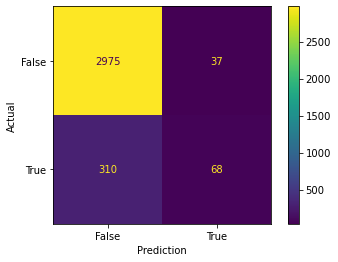

Accuracy Score is 0.898
F1 Score is 0.282
Precission Score is 0.648
Recall Score is 0.18


In [274]:
# Visualisasi data Train
print("Akurasi data training")
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

print('Accuracy Score is {:.3}'.format(accuracy_score(y_train, y_train_pred)))
print('F1 Score is {:.3}'.format(f1_score(y_train, y_train_pred)))
print('Precission Score is {:.3}'.format(precision_score(y_train, y_train_pred)))
print('Recall Score is {:.3}'.format(recall_score(y_train, y_train_pred)))

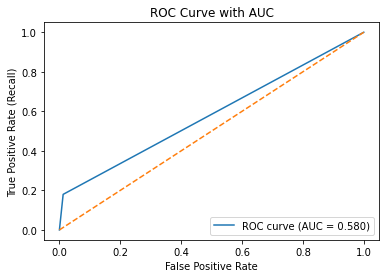

In [275]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
auc = np.round(roc_auc_score(y_train, y_train_pred),2)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve with AUC')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

Akurasi data test


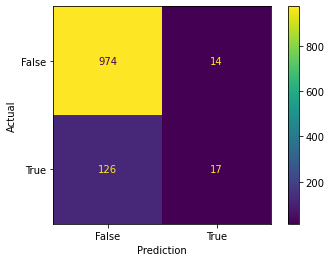

Accuracy Score is 0.876
F1 Score is 0.195
Precission Score is 0.548
Recall Score is 0.119


In [276]:
# Visualisasi data test
print("Akurasi data test")
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

print('Accuracy Score is {:.3}'.format(accuracy_score(y_test, y_test_pred)))
print('F1 Score is {:.3}'.format(f1_score(y_test, y_test_pred)))
print('Precission Score is {:.3}'.format(precision_score(y_test, y_test_pred)))
print('Recall Score is {:.3}'.format(recall_score(y_test, y_test_pred)))

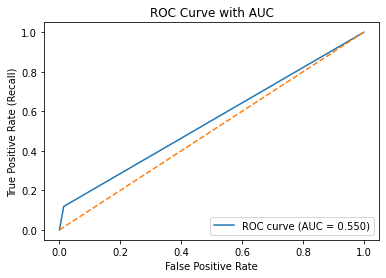

In [277]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc = np.round(roc_auc_score(y_test, y_test_pred),2)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve with AUC')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

#### Random Forest

In [57]:
# Model Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 123)
random_forest.fit(X_train_clean, y_train)

RandomForestClassifier(random_state=123)

In [58]:
# Prediksi Logistic regretion data train dan data test
y_train_pred = pd.DataFrame(random_forest.predict(X_train_clean))
y_test_pred = pd.DataFrame(random_forest.predict(X_test_clean))

Akurasi data training


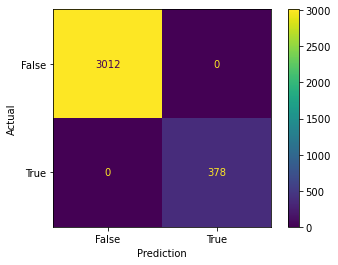

Accuracy Score is 1.0
F1 Score is 1.0
Precission Score is 1.0
Recall Score is 1.0


In [61]:
# Visualisasi data Train
print("Akurasi data training")
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

print('Accuracy Score is {:.3}'.format(accuracy_score(y_train, y_train_pred)))
print('F1 Score is {:.3}'.format(f1_score(y_train, y_train_pred)))
print('Precission Score is {:.3}'.format(precision_score(y_train, y_train_pred)))
print('Recall Score is {:.3}'.format(recall_score(y_train, y_train_pred)))

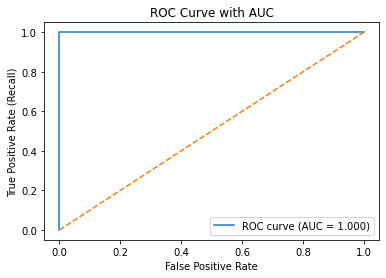

In [64]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
auc = np.round(roc_auc_score(y_train, y_train_pred),2)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve with AUC')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

Akurasi data test


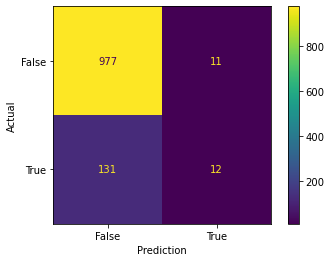

Accuracy Score is 0.874
F1 Score is 0.145
Precission Score is 0.522
Recall Score is 0.0839


In [65]:
# Visualisasi data test
print("Akurasi data test")
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

print('Accuracy Score is {:.3}'.format(accuracy_score(y_test, y_test_pred)))
print('F1 Score is {:.3}'.format(f1_score(y_test, y_test_pred)))
print('Precission Score is {:.3}'.format(precision_score(y_test, y_test_pred)))
print('Recall Score is {:.3}'.format(recall_score(y_test, y_test_pred)))

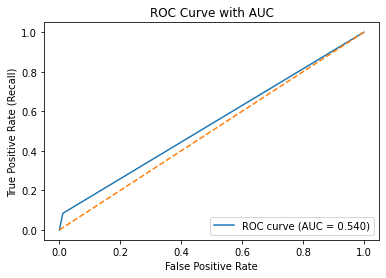

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc = np.round(roc_auc_score(y_test, y_test_pred),2)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.3f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve with AUC')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()